
Training with Batch Gradient Descent...
Epoch 1/5


C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1500/1500 - 11s - 7ms/step - accuracy: 0.8080 - loss: 0.6351 - val_accuracy: 0.9400 - val_loss: 0.2127
Epoch 2/5
1500/1500 - 9s - 6ms/step - accuracy: 0.9481 - loss: 0.1743 - val_accuracy: 0.9643 - val_loss: 0.1243
Epoch 3/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9647 - loss: 0.1164 - val_accuracy: 0.9731 - val_loss: 0.0983
Epoch 4/5
1500/1500 - 9s - 6ms/step - accuracy: 0.9727 - loss: 0.0904 - val_accuracy: 0.9761 - val_loss: 0.0834
Epoch 5/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9773 - loss: 0.0757 - val_accuracy: 0.9787 - val_loss: 0.0738

Training with Stochastic Gradient Descent...
Epoch 1/5
1500/1500 - 11s - 7ms/step - accuracy: 0.9331 - loss: 0.2123 - val_accuracy: 0.9774 - val_loss: 0.0792
Epoch 2/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9803 - loss: 0.0643 - val_accuracy: 0.9799 - val_loss: 0.0689
Epoch 3/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9858 - val_loss: 0.0481
Epoch 4/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9891 - loss

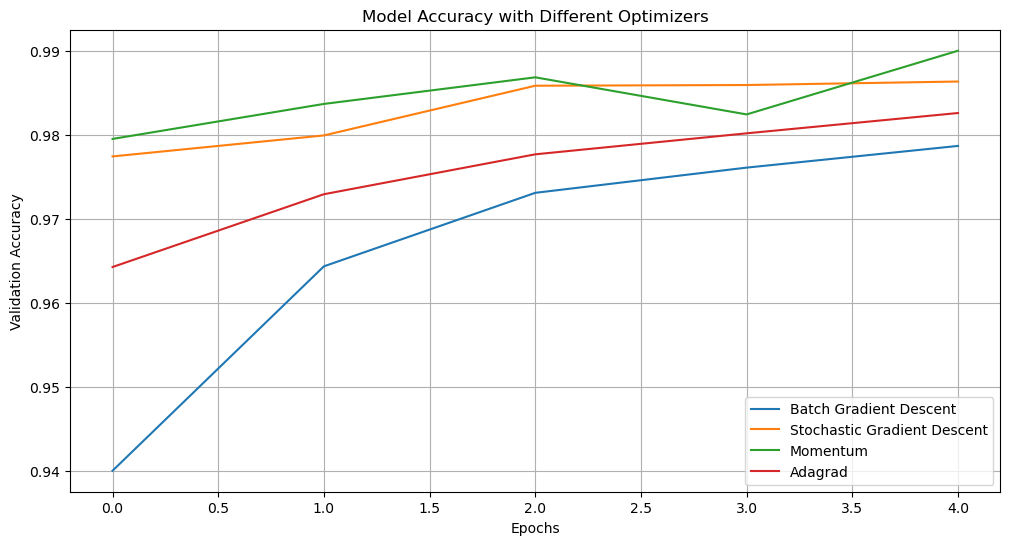

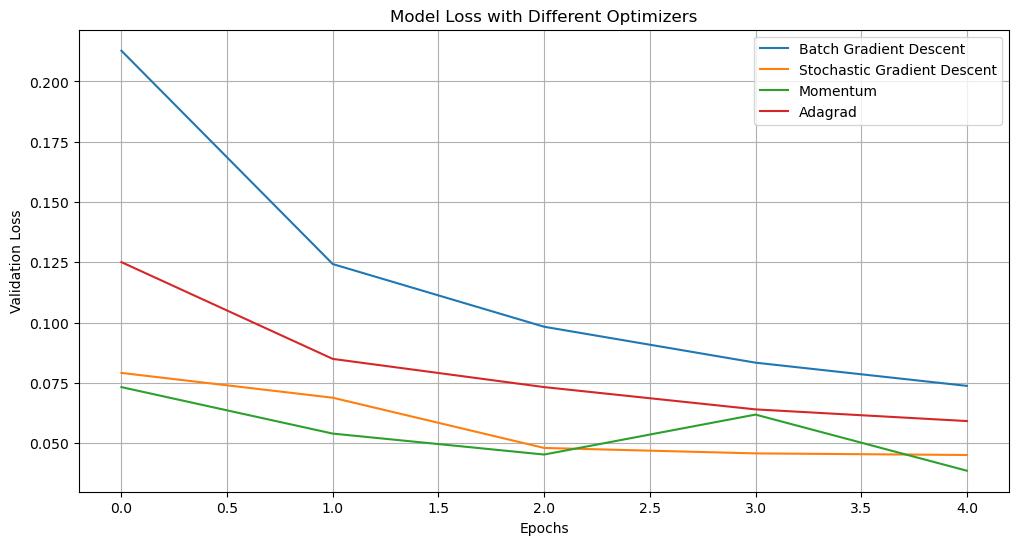

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1))  # Reshape for CNN
X_test = X_test.reshape((10000, 28, 28, 1))
X_train = X_train.astype('float32') / 255  # Normalize to [0, 1]
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Create a simple CNN model
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Optimizers
optimizers = {
    'Batch Gradient Descent': 'sgd',  # Using SGD as a representation
    'Stochastic Gradient Descent': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
}

# Train and evaluate models using different optimizers
results = {}
for name, optimizer in optimizers.items():
    model = create_model(optimizer)
    print(f"\nTraining with {name}...")
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    results[name] = history.history

# Plot accuracy for each optimizer
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)
    
plt.title('Model Accuracy with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss for each optimizer
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['val_loss'], label=name)

plt.title('Model Loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()
